### データセット読み込み

\\10.34.21.151\iot_proj\takahashi_jr\ecg_project
0: 新規に入力する
1: goto,1219
2: kawai,1115
3: matumoto,1128
4: takahashi,1220
5: takahashi_jr,1106
6: taniguchi,1107
7: yoshikura,1130
8: sato,1115
9: takamatu,1130
10: mori,0723
11: gosha,0407
12: asano,0710
13: togo,1107
14: takahashi_kazuya,0516
15: nakanishi,0407
16: miyano,0723
17: gobara,0729
18: kinoshita,0801
19: henmi,0304
20: henmi2,0304
21: kasahara,0304
22: maruyama,0304
23: miyabayashi,0304
24: patient1,1001
25: patient2,1001
26: patient3,1001
27: patient4,1001
28: patient5,1001
29: patient6,1001
30: patient7,1109
31: patient8,1109
32: patient9,1109
33: patient10,1109
\\10.34.21.151\iot_proj\takahashi_jr\ecg_project\data\raw\takahashi_test\goto\goto_1219_0
ファイル db20231219_174818.csv を読み込みました。
      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15   16
0     -3  -8  -7 -14  -3  -1   3   9   6   8  14  13  13  18  22  18  102
1      4  -3  -1  -6   3   7  10  18  14  14  21  21  18  25  28  24  102
2      2  -5  -4 -1

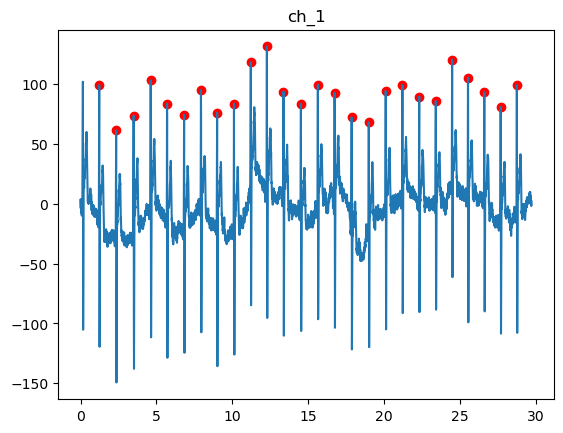

safe
[  19   34   19 ... -101  -90  -92]
[  449  1004  1579  2140  2678  3237  3790  4320  4875  5425  5955  6502
  7072  7629  8180  8738  9302  9858 10406 10957 11502]
safe
[  19   34   19 ... -101  -90  -92]
[  449  1004  1579  2140  2678  3237  3790  4320  4875  5425  5955  6502
  7072  7629  8180  8738  9302  9858 10406 10957 11502]


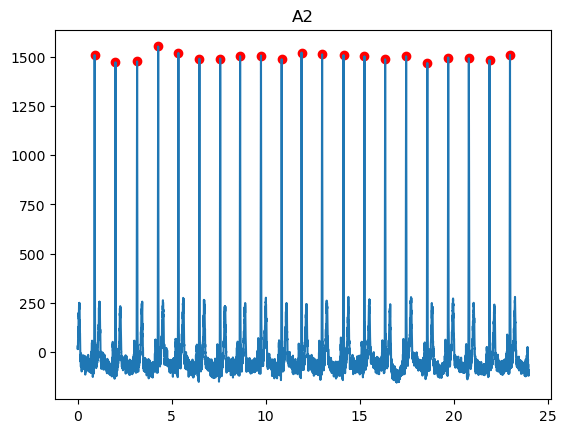

reverse==off
         0           1
0    1.232   99.145762
1    2.348   61.245944
2    3.498   73.563321
3    4.624  103.107924
4    5.700   83.653403
5    6.824   74.358513
6    7.934   95.050562
7    9.000   76.196122
8   10.110   83.621895
9   11.218  118.221706
10  12.278  131.442873
11  13.370   93.782199
12  14.520   83.447384
13  15.636   99.464351
14  16.738   92.651249
15  17.862   72.133710
16  18.988   68.044233
17  20.106   94.226217
18  21.206   99.207769
19  22.314   89.605736
20  23.406   85.863058
21  24.482  120.343567
22  25.526  105.303036
23  26.602   93.250118
24  27.678   80.936578
25  28.744   99.146368
[1.11  1.15  1.122 1.076 1.118 1.106 1.06  1.11  1.1   1.06  1.094 1.14
 1.114 1.102 1.116 1.128 1.112 1.096 1.102 1.09 ]
[1.116 1.15  1.126 1.076 1.124 1.11  1.066 1.11  1.108 1.06  1.092 1.15
 1.116 1.102 1.124 1.126 1.118 1.1   1.108 1.092 1.076 1.044 1.076 1.076
 1.066]


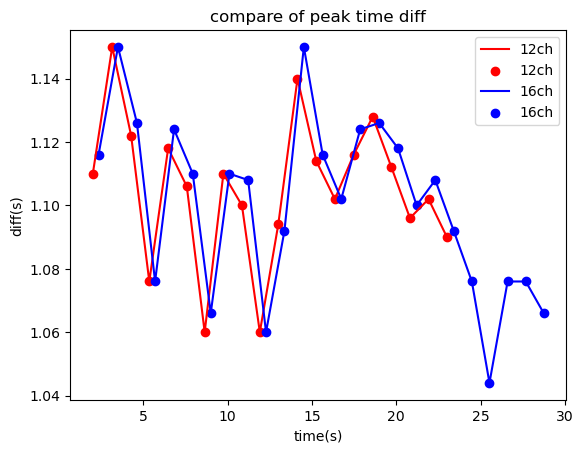

12chの最初のピークのtime=2.008
16chの対応するピークのtime=2.348
差分=0.33999999999999986
12chの最初のピークのtime=2.008
16chの対応するピークのtime=2.348
差分=0.33999999999999986
cut_time 0.33999999999999986
[1.11  1.15  1.122 1.076 1.118 1.106 1.06  1.11  1.1   1.06  1.094 1.14
 1.114 1.102 1.116 1.128 1.112 1.096 1.102 1.09 ]
[1.116 1.15  1.126 1.076 1.124 1.11  1.066 1.11  1.108 1.06  1.092 1.15
 1.116 1.102 1.124 1.126 1.118 1.1   1.108 1.092 1.076 1.044 1.076 1.076
 1.066]


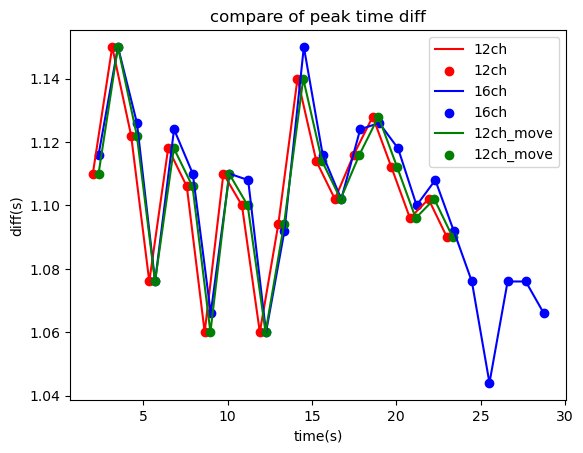

14854
14854


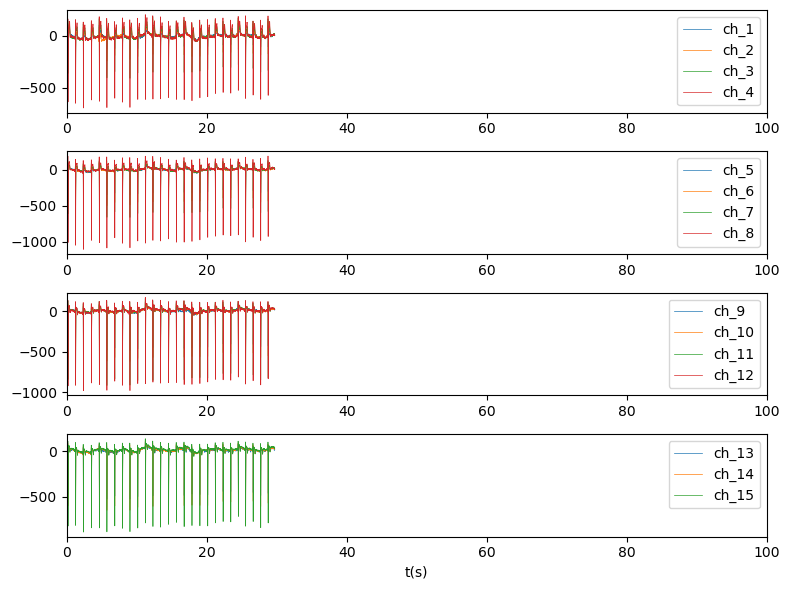

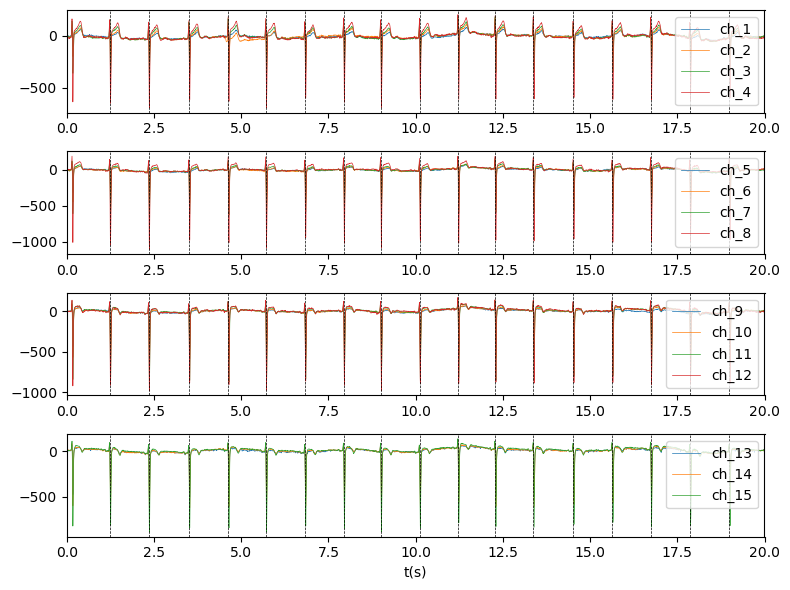

169


NameError: name 'handler' is not defined

In [ ]:
import os
from re import search
import pandas as pd
import argparse
import sys
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sympy import plot

base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
print(base_dir)
sys.path.append(base_dir)
from config.settings import (
    RAW_DATA_DIR,
    PROCESSED_DATA_DIR,
    OUTPUT_DIR,
    DATASET_MADE_DATE,
    RATE,
    RATE_16CH,
    TIME,
)
RATE_12ch = RATE
from config.name_dic import select_name_and_date
from src.dataset_creation.Make_dataset_0120 import (
    CSVReader_16ch,
    CSVReader_12ch,
    linear_interpolation_resample_All,
    validate_integer_input,
    peak_sc_plot,
    peak_sc_16ch,
    peak_sc,
    ArrayComparator,
    MultiPlotter,
)


def main(args):
    name, date = select_name_and_date()
    peak_method = "cwt"
    dataset_made_date = DATASET_MADE_DATE
    raw_data_dir = os.path.join(RAW_DATA_DIR, "takahashi_test", name, f"{name}_{date}_0")
            
    print(raw_data_dir)
    filtered_data_dir = os.path.join(
        PROCESSED_DATA_DIR, "pqrst_nkmodule_since0310_cwt", f"{name}_{date}_0.8s", "0")
    # TARGET_CHANNEL_16ch=args.TARGET_CHANNEL_16ch
    TARGET_CHANNEL_12CH = "A2"
    # ファイル読み込み
    # dir_path = "./0_packetloss_data/"+args.dir_name
    # dir_path = "./0_packetloss_data_{}/".format(DATASET_MADE_DATE)+args.dir_name
    # dir_path = args.dataset_dir
    csv_reader_16ch = CSVReader_16ch(raw_data_dir)
    df_16ch = csv_reader_16ch.process_files()
    print(df_16ch)
    cols = df_16ch.columns
    # df_15ch = pd.DataFrame()
    # for col in cols:
    #     df_15ch[col] = df_16ch[col] - df_16ch["ch_16"]
    # df_15ch = df_15ch.drop(columns=["ch_16"])

    csv_reader_12ch = CSVReader_12ch(raw_data_dir)
    df_12ch = csv_reader_12ch.process_files()
    # df_12ch_cleaned = ecg_clean_df_12ch(df_12ch)
    # input("")
    reverse = "off"
    print("TARGET_CHNNEL_16chは")
    # TARGET_CHANNEL_16ch = validate_integer_input()
    TARGET_CHANNEL_16ch = "ch_1"
    # df_16ch_pf = hpf_lpf(df_16ch.copy(),HPF_fp=2.0,HPF_fs=1.0,LPF_fp=0,LPF_fs=0,RATE=RATE_16CH)
    # df_16ch_pf = hpf_lpf(df_16ch.copy(),HPF_fp=HPF_FP,HPF_fs=HPF_FS,LPF_fp=0,LPF_fs=0,RATE=RATE_16CH)
    # df_16ch_pf = ecg_clean_df_16ch(df_16ch=df_16ch.copy(), rate=RATE_16CH)
    df_resample_16ch = linear_interpolation_resample_All(
        df=df_16ch.copy(), sampling_rate=RATE_16CH, new_sampling_rate=RATE
    )
    df_16ch_pf = df_resample_16ch.copy()
    if reverse == "off":
        sc_16ch = peak_sc_16ch(
            df_16ch_pf.copy(), RATE=RATE, TARGET=TARGET_CHANNEL_16ch
        )
        peak_sc_plot(df_16ch_pf.copy(), RATE=RATE, TARGET=TARGET_CHANNEL_16ch)
    else:
        df_16ch_reverse = df_16ch_pf.copy()
        df_16ch_reverse[TARGET_CHANNEL_16ch] = (-1) * df_16ch_pf.copy()[
            TARGET_CHANNEL_16ch
        ]
        # reverseを採用
        df_resample_16ch = df_16ch_reverse.copy()
        sc_16ch = peak_sc_16ch(
            df_16ch_reverse.copy(), RATE=RATE, TARGET=TARGET_CHANNEL_16ch
        )
        peak_sc_plot(df_16ch_reverse.copy(), RATE=RATE, TARGET=TARGET_CHANNEL_16ch)

    sc_12ch = peak_sc(df_12ch.copy(), RATE=RATE_12ch, TARGET=TARGET_CHANNEL_12CH)
    # print(sc_12ch)
    # input()
    peak_sc_plot(df_12ch.copy(), RATE=RATE_12ch, TARGET=TARGET_CHANNEL_12CH)
    print("reverse=={}".format(reverse))
    # peak_sc_plot(df_16ch_pf.copy(),RATE=RATE_16CH,TARGET=TARGET_CHANNEL_16ch)
    print(sc_16ch)

    comparator = ArrayComparator(
        sc_16ch=sc_16ch, sc_12ch=sc_12ch, cut_min_max_range=[0.0, 10000.0]
    )
    comparator.peak_diff_plot()
    cut_time = comparator.find_best_cut_time()
    comparator.peak_diff_plot_move(cut_time)
    # comparator.find_best_cut_time()
    # peak_diff_plot(sc_12ch,sc_16ch)
    Plot_16ch_pf = MultiPlotter(df_16ch_pf, RATE=RATE)
    Plot_16ch_pf.multi_plot(xmin=0, xmax=100, ylim=0)
    Plot_16ch_pf.multi_plot_16ch_with_sc(xmin=0, xmax=20, ylim=0, sc=sc_16ch)
    plt.show()
    plt.close()
    print(int(cut_time * RATE))
    # if input("write_to_CSV OK? y or n") == "y":
    #     handler.write_integer(
    #         RATE=RATE,
    #         cut_time=cut_time,
    #         target_16ch=TARGET_CHANNEL_16ch,
    #         reverse=reverse,
    #         target_12ch=TARGET_CHANNEL_12CH,
    #         cut_min_max_range=cut_min_max_range,
    #     )

    # else:
    #     return 0
    handler = AutoIntegerFileHandler(dir_path + "/同期インデックス_nkmodule.txt")

    syn_index, TARGET_CHANNEL_16ch, reverse, TARGET_CHANNEL_12CH = (
        handler.read_integer()
    )  # 同期するインデックス
    print(syn_index)
    # if(target_ch!=TARGET_CHANNEL_16ch):
    #     print("target_ch!=args.TARGE_CHSNNEL_16ch")
    #     print("target_ch"+target_ch)
    #     return 0
    # input("16ch_pf")
    if DEBUG_PLOT == True:
        if reverse == "off":
            sc_16ch_pf = peak_sc_16ch(
                df_resample_16ch[syn_index:].copy(),
                RATE=RATE_16CH,
                TARGET=TARGET_CHANNEL_16ch,
            )

        sc_12ch = peak_sc(df_12ch.copy(), RATE=RATE_12ch, TARGET=TARGET_CHANNEL_12CH)

        Plot_16ch_pf = MultiPlotter(df_resample_16ch.copy(), RATE=RATE)
        # Plot_16ch_pf.multi_plot(xmin=0,xmax=10,ylim=0)
        # Plot_16ch_pf.plot_all_channels(xmin=0,xmax=8,ylim=0)

        Plot_12ch = MultiPlotter_both(
            df12=df_12ch_cleaned,
            df15=df_resample_16ch[syn_index:].copy(),
            RATE12=RATE_12ch,
            RATE15=RATE,
        )  # cleanされた12chにする。
        Plot_12ch.multi_plot_12ch_16ch_with_sc_2(
            xmin=0,
            xmax=5,
            ylim=0,
            sc=sc_12ch,
            ch=TARGET_CHANNEL_16ch,
            png_path=args.png_path + "12chsc",
        )
        plt.show()
        plt.close()
        # input()

    # print(df_12ch)
    print(syn_index)
    print(df_resample_16ch)

    # df_syn_resample_16ch=df_resample_16ch[syn_index:].copy()
    df_syn_resample_16ch = df_resample_16ch[syn_index:].copy().reset_index(drop=True)
    # print(df_resample_16ch)
    # df_syn_resample_16ch=linear_interpolation_resample_All(df=df_syn_16ch,sampling_rate=RATE_16CH,new_sampling_rate=RATE)
    df_syn_resample_16ch_24s = df_syn_resample_16ch[: TIME * RATE]
    print(df_syn_resample_16ch_24s)
    plt.plot(df_syn_resample_16ch_24s["ch_1"])
    plt.plot(df_12ch_cleaned["A2"])
    plt.show()

    con_data = pd.concat(
        [df_syn_resample_16ch_24s, df_12ch_cleaned], axis=1
    )  # df_12ch_cleanedを用いる。
    con_data_dir = args.dataset_output_path + "/" + args.output_filepath
    # con_data_dir="Dataset/pqrst_nkmodule_since{}_{}/".format(DATASET_MADE_DATE,args.peak_method)+args.output_filepath
    # con_data_dir="Dataset/pqrst_nkmodule_since{}_{}/".format(DATASET_MADE_DATE,args.peak_method)+args.output_filepath
    create_directory_if_not_exists(con_data_dir)

    con_data.to_csv(con_data_dir + "/condata_24s.csv", index=None)

if __name__ == "__main__":
    main(args=None)    
    

\\10.34.21.151\iot_proj\takahashi_jr\ecg_project
0: 新規に入力する
1: goto,1219
2: kawai,1115
3: matumoto,1128
4: takahashi,1220
5: takahashi_jr,1106
6: taniguchi,1107
7: yoshikura,1130
8: sato,1115
9: takamatu,1130
10: mori,0723
11: gosha,0407
12: asano,0710
13: togo,1107
14: takahashi_kazuya,0516
15: nakanishi,0407
16: miyano,0723
17: gobara,0729
18: kinoshita,0801
19: henmi,0304
20: henmi2,0304
21: kasahara,0304
22: maruyama,0304
23: miyabayashi,0304
24: patient1,1001
25: patient2,1001
26: patient3,1001
27: patient4,1001
28: patient5,1001
29: patient6,1001
30: patient7,1109
31: patient8,1109
32: patient9,1109
33: patient10,1109
\\10.34.21.151\iot_proj\takahashi_jr\ecg_project\data\raw\takahashi_test\patient5\patient5_1001_0
ファイル 12ch_YI_2824605_fukuda12ecg_csv.csv を読み込みました。
      A1  A2  A3  aVR  aVL  aVF  V1  V2  V3  V4  V5  V6
0    -11  -6   5    9   -8    0  -6 -12 -17 -15 -20 -21
1    -11  -7   4    9   -7   -1  -5 -12 -16 -15 -20 -20
2     -9  -7   2    8   -5   -2  -5 -13 -16 -15 -19

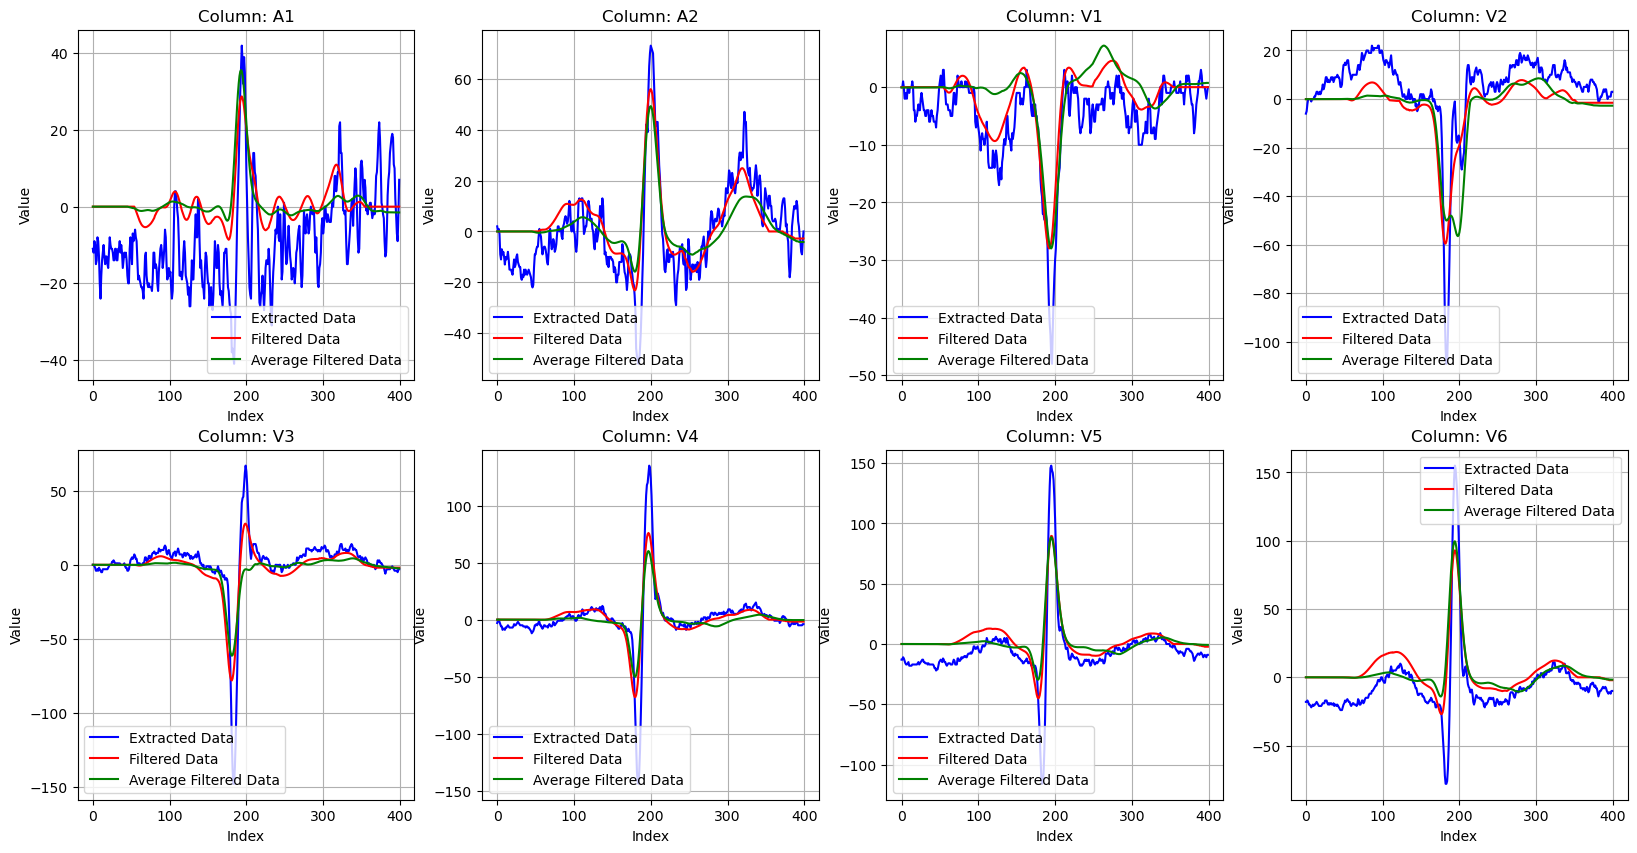

In [49]:
import os
from re import search
import pandas as pd
import neurokit2 as nk
import argparse
import sys
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sympy import plot

base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
print(base_dir)
sys.path.append(base_dir)
from config.settings import (
    RAW_DATA_DIR,
    PROCESSED_DATA_DIR,
    OUTPUT_DIR,
    DATASET_MADE_DATE,
    RATE,
    RATE_16CH,
    TIME,
)
RATE_12ch = RATE
from config.name_dic import select_name_and_date
from src.dataset_creation.Make_dataset_0120 import (
    CSVReader_16ch,
    CSVReader_12ch,
    linear_interpolation_resample_All,
    validate_integer_input,
    peak_sc_plot,
    peak_sc_16ch,
    peak_sc,
    ArrayComparator,
    MultiPlotter,
    AutoIntegerFileHandler
)


def main(args):
    name, date = select_name_and_date()
    peak_method = "cwt"
    dataset_made_date = DATASET_MADE_DATE
    raw_data_dir = os.path.join(RAW_DATA_DIR, "takahashi_test", name, f"{name}_{date}_0")    
    print(raw_data_dir)
    csv_reader_12ch = CSVReader_12ch(raw_data_dir)
    df_12ch = csv_reader_12ch.process_files()
    csv_reader_16ch = CSVReader_16ch(raw_data_dir)
    df_16ch = csv_reader_16ch.process_files()
    
    # 12chのデータ切り出し
    a2_signal = df_12ch["A2"].values
    rpeaks_a2 = nk.ecg_peaks(a2_signal, RATE)[1][
        "ECG_R_Peaks"
    ]  # R波の位置を取得
    print(rpeaks_a2)
    print(len(rpeaks_a2))
    print("a")
    start_index = rpeaks_a2[0] - 200  # R波の前200msを取得
    end_index = rpeaks_a2[0] + 200  # R波の後200msを取得
    
    print(start_index, end_index)
    # インデックスを0からに変更
    extracted_df_12ch = df_12ch.iloc[start_index:end_index].copy()
    extracted_df_12ch.reset_index(drop=True, inplace=True)
    
    # 16chのデータ切り出し
    handler = AutoIntegerFileHandler(raw_data_dir + "/同期インデックス_nkmodule.txt")
    syn_index, TARGET_CHANNEL_16ch, reverse, TARGET_CHANNEL_12CH = (
        handler.read_integer()
    )  # 同期するインデックス
    df_resample_16ch = linear_interpolation_resample_All(
        df=df_16ch.copy(), sampling_rate=RATE_16CH, new_sampling_rate=RATE
    )
    df_resample_16ch = df_resample_16ch.iloc[syn_index:syn_index + 10000].copy().reset_index(drop=True)
    ch1_signal = df_resample_16ch["ch_1"].values
    rpeaks_16ch = nk.ecg_peaks(ch1_signal, RATE)[1][
        "ECG_R_Peaks"
    ]  # R波の位置を取得
    start_index = rpeaks_16ch[0] - 200  # R波の前200msを取得
    end_index = rpeaks_16ch[0] + 200  # R波の後200msを取得
    print(rpeaks_16ch)
    
    extracted_df_16ch = df_resample_16ch.iloc[start_index:end_index].copy()
    extracted_df_16ch.reset_index(drop=True, inplace=True)
    
    filtered_data_dir = os.path.join(
        PROCESSED_DATA_DIR, "pqrst_nkmodule_since0310_cwt", f"{name}_{date}_0.8s", "0")
    filtered_data_path = os.path.join(filtered_data_dir, "dataset_000.csv")
    filtered_df = pd.read_csv(filtered_data_path)
    avg_filtered_data_path = os.path.join(filtered_data_dir, "moving_ave_datasets", "dataset_000.csv")
    avg_filtered_df = pd.read_csv(avg_filtered_data_path)
    print(filtered_df)
    print(avg_filtered_df)
    columns = ["A1", "A2", "V1", "V2", "V3", "V4", "V5", "V6"]
    # 8つ分のプロットを並べて表示
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 4, i + 1)
        plt.plot(extracted_df_12ch[col], label='Extracted Data', color='blue')
        plt.plot(filtered_df[col], label='Filtered Data', color='red')
        plt.plot(avg_filtered_df[col], label='Average Filtered Data', color='green')
        plt.title(f'Column: {col}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
    plt.savefig(os.path.join(filtered_data_dir, f"comparison.svg"))
        
    # 16個分のプロットを並べて表示
    # plt.figure(figsize=(20, 10))
    # for i in range(16):
    #     plt.subplot(4, 4, i + 1)
    #     plt.plot(extracted_df_16ch[f'ch_{i+1}'], label='Extracted Data', color='blue')
    #     plt.plot(filtered_df[f'ch_{i+1}'], label='Filtered Data', color='red')
    #     plt.plot(avg_filtered_df[f'ch_{i+1}'], label='Average Filtered Data', color='green')
    #     plt.title(f'Channel: {i+1}')
    #     plt.xlabel('Index')
    #     plt.ylabel('Value')
    #     plt.legend()
    #     plt.grid(True)
    

if __name__ == "__main__":
    main(args=None)       